In [1]:
"""
this test function is to test the validity of the rand() system function whether
it is giving a uniformly distributed random value between 0 and 1 as advertised
The test is setup to observe the following:
whether the ratio of the total occurance of a ramdom value is less then the predefined probability value, versus the total number
of trials, which gives the probability that this happens

result: if the ratio approximates to p, we have high confidence level regarding the rand() function
if the ratio do not approxmate to p, we have low confidence level regarding the rand() function, in which case, we may
tune the seed of the random generator function, to experiment regarding higher confidence level, if our system require higher
approxmation to the predefined probability

In general, the higher approximation precision, the bettwer our random experiments are served.
"""
function test_rand(p, N)
    x = zeros(N)
    y = zeros(N)
    
    for i in 1:N
        r = rand()
        if r < p
            x[i] = 1
            y[i] = r
        end
    end
    
    #@show x
    #@show y
    @show sum(x)/N
    return [x, y]
end
            
    
"""
this function generate the bernuouli trial event
"""
function generate_bernoulli(p)
    r = rand()
    if r < p
        return true
    else
        return false

    end
end

"""
this function generate the recover event by giving a maximum recovery time, within which, given a known or tried probability of 
recovery on each single unit time, the procedure simulates recovery with that probability on each day, and records the actual
time unit measures for the particular recovery event, and return 0 and it does not recover, in which case, our maximum value
could be wrong, or the person dies, which would be an interesting case, when we consider the Death Rates.
Note:
my implementation is different from the text book answer which return 1 or 0 for the Random Variable

Quote from slide:
Modelling recovery
Let’s return to modelling recovery from infection Recover at each time step with probability 𝑝
Basic question: How long does it take until I recover?
At each time step 𝑖 generate a Bernoulli random variable with probability 𝑝 of success (recovery)
If 𝑋𝑖 = 1, we recover Else keep going

comments: The above algorithm is correct, when 1 is interpreted as boolean true,

I.e. Wait until first time 𝜏 when value is 1 Simple example of a first-passage problem
Time to recovery 𝜏 is also a random variable: Each time run simulation will get different outcome


comments: based on the above statement, I implemented the recovery event generation returning the 𝜏 time to recovery

"""
function generate_recovery_event(p, N)
    for i in 1:N
        if generate_bernoulli(p)
            return i
        end
    end
    return 0
end


"""
Quote from MIT text:
What questions are we interested in? Average time to recovery
How large fluctuations are
More generally, want frequency of each outcome: probability distribution.

Computers are good at experiments like this:
Generate data
Count how many times each possible outcome occurs
Run experiment many times: Monte Carlo simulation

We have finite sample from ideal population
If repeat experiment, get different sample with different
counts
Plot implies die is biased (non-uniform) – one bar taller than others.
But repeating calculation gives different results each time How characterize this variability?
Random variables have set of possible outcomes
Probability distribution measures how frequently each outcome occurs
Variability between different experiments measured by mean and variance

"""
function monte_carlo_simulation(p, N, M)
    recovery_events = []
    
    for i in 1:M
        time_step_to_recover = generate_recovery_event(p, N)
        push!(recovery_events, time_step_to_recover)
    end
    return recovery_events
end

p=0.25
N =50
M = 1000
test_rand(p, N)
events = monte_carlo_simulation(p, N, M)
@show events
using Statistics
@show mean(events)
@show maximum(events)
@show minimum(events)

sum(x) / N = 0.28
events = Any[6, 4, 10, 6, 4, 3, 2, 1, 1, 5, 3, 7, 2, 14, 4, 8, 4, 4, 1, 4, 5, 1, 6, 4, 2, 8, 8, 9, 2, 8, 7, 4, 6, 2, 2, 3, 3, 8, 15, 3, 5, 4, 2, 7, 1, 1, 5, 1, 3, 7, 3, 9, 2, 8, 2, 2, 1, 1, 1, 3, 6, 2, 9, 1, 3, 1, 3, 13, 4, 2, 6, 3, 8, 1, 5, 5, 1, 7, 5, 3, 1, 5, 4, 1, 1, 7, 2, 2, 2, 2, 3, 1, 3, 1, 9, 2, 1, 3, 2, 1, 1, 2, 1, 8, 3, 2, 2, 1, 2, 1, 2, 1, 5, 1, 17, 1, 8, 5, 4, 8, 6, 5, 8, 2, 5, 1, 2, 2, 2, 2, 3, 10, 3, 6, 2, 5, 12, 6, 4, 2, 2, 1, 5, 3, 13, 1, 1, 1, 2, 1, 3, 7, 4, 2, 1, 9, 5, 7, 6, 1, 1, 2, 9, 3, 16, 1, 1, 7, 1, 3, 3, 8, 2, 2, 6, 18, 5, 1, 2, 5, 4, 7, 2, 3, 1, 4, 1, 10, 1, 3, 6, 11, 3, 1, 1, 6, 2, 3, 3, 7, 1, 4, 2, 5, 3, 9, 1, 2, 7, 3, 2, 5, 3, 2, 5, 1, 1, 10, 1, 8, 5, 9, 4, 10, 4, 7, 10, 1, 2, 4, 7, 7, 4, 2, 2, 3, 3, 3, 2, 1, 1, 6, 5, 5, 16, 3, 9, 5, 7, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 2, 2, 5, 1, 3, 2, 4, 3, 12, 4, 2, 5, 2, 1, 2, 9, 3, 3, 2, 3, 4, 2, 7, 3, 5, 1, 3, 3, 10, 8, 3, 8, 1, 2, 8, 1, 1, 2, 1, 4, 3, 7, 2, 5, 2, 3, 2, 4, 1, 1, 2, 5, 3, 3, 3, 4, 2, 

1

New Idea:

Combind Derivative or Differential Equation with Probablility Theory in Approx of the SIR model, wtih simulation


**My Result**

It seems my average day to recover is 4, while the MIT code give 5, after analysis of the MIT code, we identify its fault as follows:

it fails to record the $\tau$ value, the time to recover Random Variable value


**Developing Page 50 SIR program from the Calculus in Context Text Book**

parameters = [1.0e-5, 0.07142857142857142, 0.023809523809523808]
n = 200.0
(t, S, I, R) = (1, 45400.0, 2040.0, 2500.0)
(t, S, I, R) = (2, 44473.84, 2771.874285714286, 2645.714285714286)
(t, S, I, R) = (3, 43241.081065170285, 3740.6451933331164, 2843.705306122449)
(t, S, I, R) = (4, 41623.585644760715, 5001.888690568103, 3110.894248503386)
(t, S, I, R) = (5, 39541.6202217865, 6607.483762059641, 3468.172012115393)
(t, S, I, R) = (6, 36928.914086376666, 8590.90572965427, 3940.1351379767957)
(t, S, I, R) = (7, 33756.38589023103, 10945.252427737596, 4553.77126152353)
(t, S, I, R) = (8, 30061.664244064046, 13597.569080786714, 5335.575006361929)
(t, S, I, R) = (9, 25974.008681643278, 16390.21806408494, 6306.829940703837)
(t, S, I, R) = (10, 21716.81201873759, 19086.441578030157, 7477.55980242419)
(t, S, I, R) = (11, 17571.84538017061, 21413.651875832362, 8840.877057997772)
(t, S, I, R) = (12, 13809.071582301343, 23137.030256955688, 10370.423620557227)
(t, S, I, R) = (13, 10614.062512099612, 2

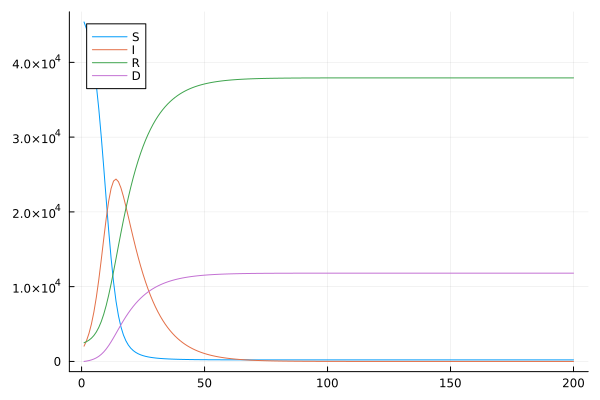

In [12]:
function Solve_SIR_Problem(u, p, tspan)
    n = tspan[2]
    @show n
    
    S, I, R, D  = u
    β, γ, μ  = p 
    t = 1
    Δt = 1
    @show t, S, I, R
    
    time_sequence = [t]
    S_sequence = [S]
    I_sequence = [I]
    R_sequence = [R]
    D_sequence = [D]
   
    for k in 1:n-1
        dS = -β * S * I
        dI = +β * S * I - γ* I -μ * I
        dR = +γ * I 
        dD = +μ * I
        ΔS = dS * Δt
        ΔI = dI * Δt
        ΔR = dR * Δt
        ΔD = dD * Δt
        t += Δt
        S += ΔS
        I += ΔI
        R += ΔR
        D += ΔD
        @show t, S, I, R
        #du .= (t, dS, dI, dR)   # copy the values into the vector du; note the `.`
        #@show t, dS, dI, dR, dD
        push!(time_sequence, t)
        push!(S_sequence, S)
        push!(I_sequence, I)
        push!(R_sequence, R)
        push!(D_sequence, D)
     
    end
    sol = [time_sequence, S_sequence, I_sequence, R_sequence, D_sequence]
   
    return sol
end


#########Main Program Starts here:#########
β = 0.00001
γ = 1/14
μ = 1/42

parameters = [β, γ, μ]

@show parameters

S₀ = 45400.0   # write subscript 0 as S\_0<TAB>
I₀ = 2040.0
R₀ = 2500.0
D₀ = 0.0

initial_values = [S₀, I₀, R₀, D₀]

time_span = [0.0, 200.0]  # initial and final time

solution = Solve_SIR_Problem(initial_values, parameters, time_span )

using Plots
plot(solution[1], solution[2], label="S")
plot!(solution[1], solution[3], label="I")
plot!(solution[1], solution[4], label="R")
plot!(solution[1], solution[5], label="D")  


In [13]:
methods(plot)


# 4 methods for generic function "plot" from RecipesBase:
 [1] plot(sp::Plots.Subplot, args...; kw...)
     @ Plots ~/.julia/packages/Plots/du2dt/src/plot.jl:290
 [2] plot(plt1::Plots.Plot, plt2::Union{Plots.PlaceHolder, Plots.Plot}, plts_tail::Union{Plots.PlaceHolder, Plots.Plot}...; kw...)
     @ Plots ~/.julia/packages/Plots/du2dt/src/plot.jl:112
 [3] plot(plt::Plots.Plot, args...; kw...)
     @ Plots ~/.julia/packages/Plots/du2dt/src/plot.jl:206
 [4] plot(args...; kw...)
     @ Plots ~/.julia/packages/Plots/du2dt/src/plot.jl:93